The target of this notebook is to compare several algorithms from PyNNCML and pycomlink on open datasets using poligrain.

# Imports

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
for submodule_name in ['PyNNcml',"pycomlink"]:
    sys.path.append(os.path.join(os.getcwd(), submodule_name))

In [2]:
import pynncml
import pycomlink
import poligrain as plg

/Users/haihab01/envs/research_opensence_coding/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load OpenMRG Dataset

In [3]:

( ds_rad,
    ds_cmls,
    ds_gauges_municp,
    ds_gauge_smhi) = plg.example_data.load_openmrg(data_dir="example_data", subset="8d")

File already exists at example_data/openmrg_cml_8d.nc
Not downloading!
File already exists at example_data/openmrg_rad_8d.nc
Not downloading!
File already exists at example_data/openmrg_municp_gauge_8d.nc
Not downloading!
File already exists at example_data/openmrg_smhi_gauge_8d.nc
Not downloading!


# Run Wet Dry Classification using Std from PyNNCML

In [ ]:
from pynncml.cml_methods.apis.xarray_processing.wet_dry_methods import create_wet_dry_std
wd_std=create_wet_dry_std(threshold=0.2)
ds_cmls_wet_dry=wd_std(ds_cmls)

# Plot the results

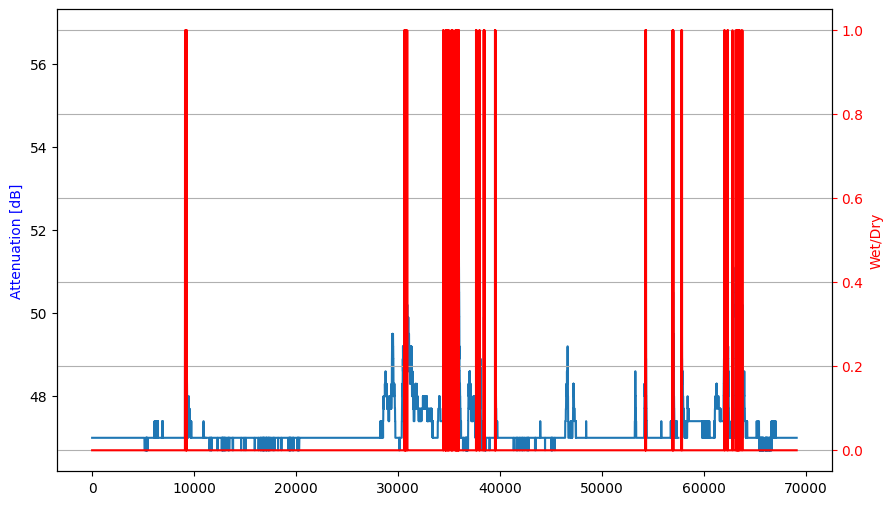

In [11]:
data_cml=ds_cmls_wet_dry.isel(sublink_id=0,cml_id=0)
att=np.asarray(data_cml.tsl)-np.asarray(data_cml.rsl)
wd=np.asarray(data_cml.wet_dry_detection)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(att)
ax1.set_ylabel('Attenuation [dB]', color='b')
# Create a second axes object that shares the same x-axis
ax2 = ax1.twinx()
ax2.tick_params('y', colors='r')

ax2.plot(wd,color="red")
ax2.set_ylabel('Wet/Dry', color='red')
plt.grid()
plt.show()